### Introduction

<p>The project involves implementing an image classification system using Convolutional Neural Networks (CNNs) for the CIFAR-10 dataset. The models, including a basic CNN and alternatives, will be optimized and compared using Grid Search and Random Search for hyperparameter tuning, aiming to achieve higher accuracy in classifying objects within the dataset.
</p>

<h4>Loading Libraries</h4>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV


<h4>Load Dataset</h4>

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


<h4>Normalize pixel values to be in the range [0, 1]</h4>

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [4]:
type(train_images)


numpy.ndarray

In [6]:
len(train_images)

50000

<h4>Exploring the Images</h4>

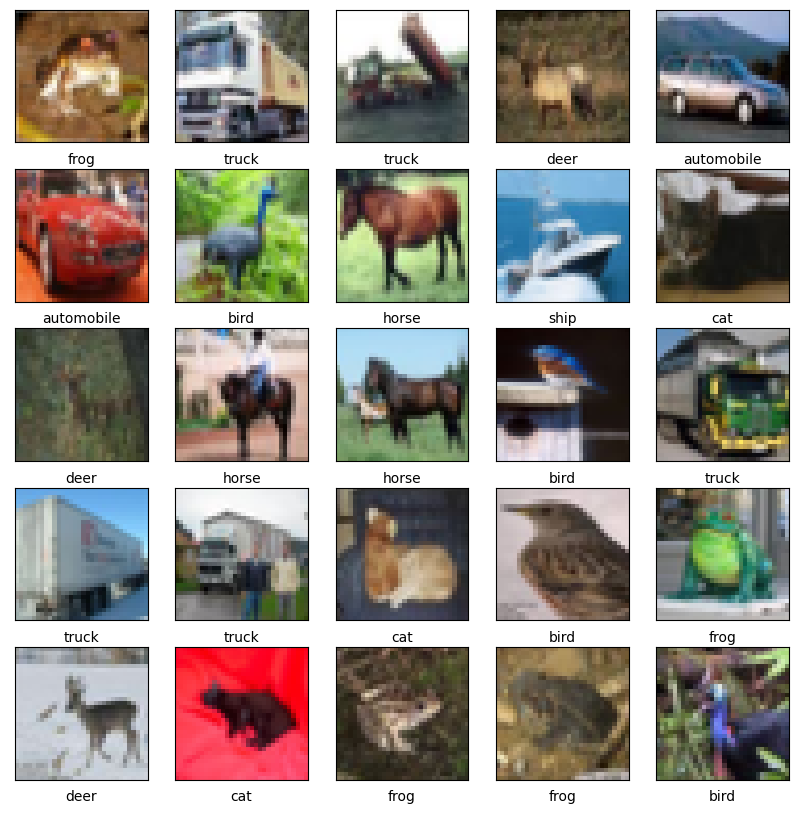

In [8]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot images with their corresponding labels
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([]), plt.yticks([])  # Hide ticks
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[int(labels[i])])
    plt.show()

# Plot some images from the training set
plot_images(train_images, train_labels)

<h4>Model 1</h4>

<p>This code defines, trains, and visualizes the training history of a basic CNN model for image classification on the CIFAR-10 dataset. The training process is monitored for 10 epochs, and the training history is plotted to assess the model's performance and identify potential overfitting or underfitting.</p>

In [5]:
# Function to create and train a CNN model
def create_and_train_model(model, epochs=10):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    
    return model, history

In [6]:
# Function to plot the training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training History')
    plt.legend(loc='lower right')
    plt.show()

<h4>Basic CNN </h4>

### Features
    - Three convolutional layers with ReLU activation.
    - Max-pooling layers after the first and second convolutional layers for spatial down-sampling.  
    - Final layer with softmax activation for classification.

In [7]:
# Model 1: Basic CNN
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1, history1 = create_and_train_model(model1, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 202s 128ms/step - loss: 1.7278 - accuracy: 0.3961 - val_loss: 1.3750 - val_accuracy: 0.4995
Epoch 2/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.2952 - accuracy: 0.5367 - val_loss: 1.2961 - val_accuracy: 0.5430
Epoch 3/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.1492 - accuracy: 0.5966 - val_loss: 1.1605 - val_accuracy: 0.5983
Epoch 4/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.0556 - accuracy: 0.6284 - val_loss: 1.1453 - val_accuracy: 0.6045
Epoch 5/10
1563/1563 [==============================] - 310s 198ms/step - loss: 0.9811 - accuracy: 0.6575 - val_loss: 1.0704 - val_accuracy: 0.6332
Epoch 6/10
1563/1563 [==============================] - 415s 266ms/step - loss: 0.9102 - accuracy: 0.6845 - val_loss: 1.0144 - val_accuracy: 0.6592
Epoch 7/10
1563/1563 [==============================] - 336s 215ms/step - loss: 0.8486 - accuracy: 0.7070 - val_

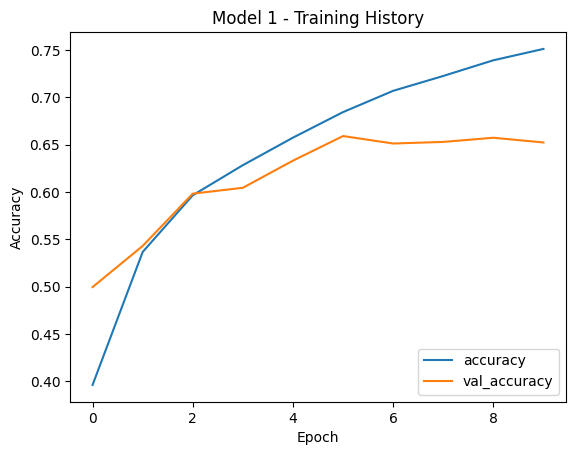

In [8]:
plot_history(history1, 'Model 1')

<h4>Model 2</h4>

### LeNet-5:

-- Two convolutional layers with larger filter sizes (5x5) and fewer filters than the basic CNN.

-- Max-pooling layers after each convolutional layer.

-- The final dense layers have different sizes (120, 84) before the output layer.

In [13]:
model2 = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model2, history2 = create_and_train_model(model2, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 142s 84ms/step - loss: 1.6152 - accuracy: 0.4090 - val_loss: 1.5215 - val_accuracy: 0.4541
Epoch 2/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.3536 - accuracy: 0.5188 - val_loss: 1.2750 - val_accuracy: 0.5462
Epoch 3/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2276 - accuracy: 0.5644 - val_loss: 1.1862 - val_accuracy: 0.5691
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.1418 - accuracy: 0.5967 - val_loss: 1.2593 - val_accuracy: 0.5515
Epoch 5/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.0792 - accuracy: 0.6177 - val_loss: 1.1438 - val_accuracy: 0.5877
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0242 - accuracy: 0.6378 - val_loss: 1.1142 - val_accuracy: 0.6041
Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9819 - accuracy: 0.6532 - val_loss: 1

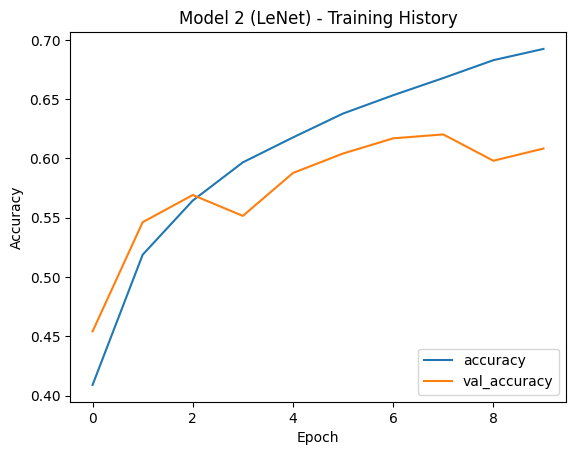

In [15]:
plot_history(history2, 'Model 2 (LeNet)')

In [19]:
# Model 3: Simple Feedforward Neural Network
model3 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [20]:
# Train the simple feedforward model
model3, history3_simple = create_and_train_model(model3, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 63s 33ms/step - loss: 1.9139 - accuracy: 0.3095 - val_loss: 1.7700 - val_accuracy: 0.3631
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7611 - accuracy: 0.3680 - val_loss: 1.7089 - val_accuracy: 0.3885
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7195 - accuracy: 0.3806 - val_loss: 1.7064 - val_accuracy: 0.3822
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6937 - accuracy: 0.3919 - val_loss: 1.7369 - val_accuracy: 0.3739
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6776 - accuracy: 0.3990 - val_loss: 1.6645 - val_accuracy: 0.4071
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6655 - accuracy: 0.4038 - val_loss: 1.6752 - val_accuracy: 0.3972
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6528 - accuracy: 0.4077 - val_loss: 1.6741 -

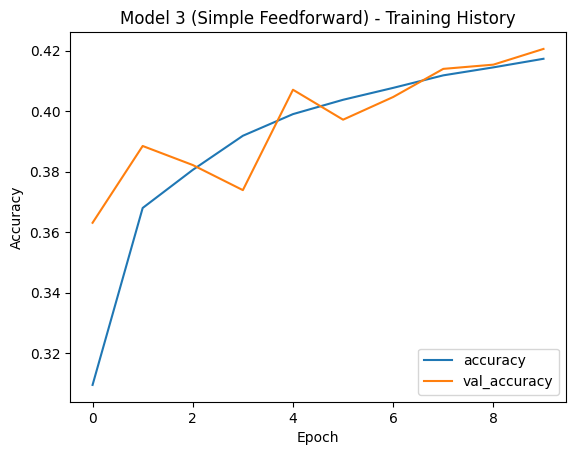

In [21]:
plot_history(history3_simple, 'Model 3 (Simple Feedforward)')


In [22]:
# Evaluate models on the test set
evaluations = []

for model, model_name in zip([model1, model2, model3], ['Model 1', 'Model 2 (LeNet)', 'Model 3 (VGG16)']):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    evaluations.append((model_name, test_acc))



313/313 [==============================] - 2s 5ms/step - loss: 1.6402 - accuracy: 0.4206


In [23]:
# Choose the best model based on the highest test accuracy
best_model_name, best_accuracy = max(evaluations, key=lambda x: x[1])
print(f"\nBest Model: {best_model_name} | Test Accuracy: {best_accuracy}")


Best Model: Model 1 | Test Accuracy: 0.7135000228881836


In [7]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

In [8]:
# Updated function to create and train a CNN model with dropout
def create_and_train_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dropout(dropout_rate),  # Add dropout here
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



In [10]:
# Wrap the Keras model for use with scikit-learn
keras_model = KerasClassifier(build_fn=create_and_train_model, epochs=2, batch_size=32, verbose=1,dropout_rate=0.2)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'optimizer': ['adam', 'rmsprop']
}

# Create and fit the Grid Search model
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=2, verbose=2)
grid_result = grid.fit(train_images, train_labels)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
782/782 [==============================] - 100s 117ms/step - loss: 1.7307 - accuracy: 0.3625
Epoch 2/2
782/782 [==============================] - 35s 44ms/step
[CV] END .....................................optimizer=adam; total time= 4.5min


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
782/782 [==============================] - 108s 133ms/step - loss: 1.7009 - accuracy: 0.3680
Epoch 2/2
782/782 [==============================] - 38s 45ms/step
[CV] END .....................................optimizer=adam; total time= 4.3min


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
782/782 [==============================] - 113s 135ms/step - loss: 1.7186 - accuracy: 0.3635
Epoch 2/2
782/782 [==============================] - 39s 49ms/step
[CV] END ..................................optimizer=rmsprop; total time= 4.4min


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
782/782 [==============================] - 111s 127ms/step - loss: 1.6855 - accuracy: 0.3735
Epoch 2/2
782/782 [==============================] - 60s 75ms/step
[CV] END ..................................optimizer=rmsprop; total time= 5.2min


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
1563/1563 [==============================] - 314s 197ms/step - loss: 1.5610 - accuracy: 0.4311
Epoch 2/2
 276/1563 [====>.........................] - ETA: 3:17 - loss: 1.2582 - accuracy: 0.5540

<h4>Saving Model 1</h4>

Since this is the one with best accurency

In [9]:
model1.save("model1.h5")

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow import keras
from PIL import Image
import numpy as np

In [26]:
# Load the trained model
model = keras.models.load_model("model1.h5")

# Preprocess the input image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Make predictions
def classify_image(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name


In [27]:
image_path = "deer.jfif"
predicted_class = classify_image(image_path)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 465ms/step
Predicted Class: deer
